In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
scores_df = pd.read_csv('df.csv')

In [3]:
scores_df.head()

,School Year,School Code,Organization,Assessment Name,ContentArea,Grade,PctProficient,ScaleScoreAvg,FallEnrollment,"Students Per Teacher, Regular",...,Students Per Nurse,Students Per Social Worker,Students Per Principal,Students Per Guidance Counselor,Students Per Assistant Principal,Students Per Librarian,Students Per Service Aide,Students Per Bus Driver & Laborer,Students Per Other General Support,Students Per Psychometrist
0,2015,610,Allen Frear Elementary School,Smarter Balanced Summative Assessment,ELA,All Students,69.06,NaN,699.0,19.971429,...,699.0,NaN,699.0,699.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,610,Allen Frear Elementary School,Smarter Balanced Summative Assessment,MATH,All Students,59.75,NaN,699.0,19.971429,...,699.0,NaN,699.0,699.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,612,Major George S. Welch Elementary School,Smarter Balanced Summative Assessment,ELA,All Students,80.84,NaN,436.0,16.769231,...,NaN,NaN,436.0,436.0,436.0,436.0,NaN,NaN,NaN,NaN
3,2015,612,Major George S. Welch Elementary School,Smarter Balanced Summative Assessment,MATH,All Students,65.12,NaN,436.0,16.769231,...,NaN,NaN,436.0,436.0,436.0,436.0,NaN,NaN,NaN,NaN
4,2015,616,Nellie Hughes Stokes Elementary School,Smarter Balanced Summative Assessment,ELA,All Students,63.08,NaN,442.0,17.680000,...,442.0,NaN,442.0,442.0,442.0,442.0,NaN,NaN,NaN,NaN


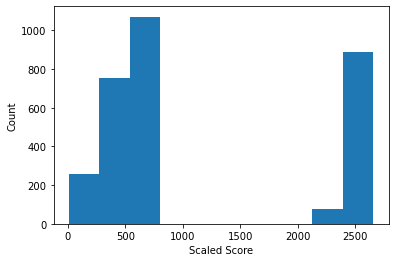

In [4]:
ScaleScoreAvg = scores_df['ScaleScoreAvg']
_ = plt.hist(ScaleScoreAvg)
_ = plt.xlabel('Scaled Score')
_ = plt.ylabel('Count')
plt.show()

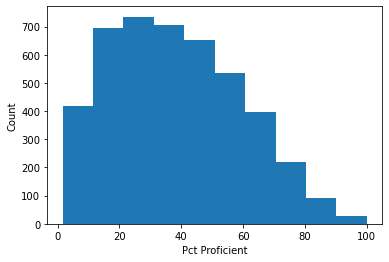

In [5]:
PctProficient = scores_df['PctProficient']
_ = plt.hist(PctProficient)
_ = plt.xlabel('Pct Proficient')
_ = plt.ylabel('Count')
plt.show()

In [6]:
math_scores_df = scores_df[scores_df['ContentArea'] == 'MATH']
ela_scores_df = scores_df[scores_df['ContentArea'] == 'ELA']

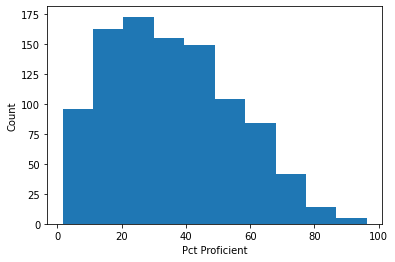

In [7]:
MathPctProficient = math_scores_df['PctProficient']
_ = plt.hist(MathPctProficient)
_ = plt.xlabel('Pct Proficient')
_ = plt.ylabel('Count')
plt.show()

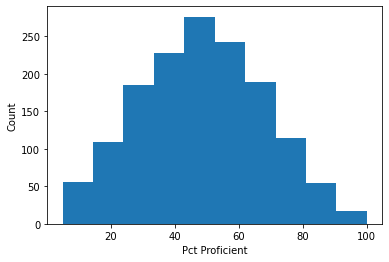

In [8]:
ELAPctProficient = ela_scores_df['PctProficient']
_ = plt.hist(ELAPctProficient)
_ = plt.xlabel('Pct Proficient')
_ = plt.ylabel('Count')
plt.show()

In [9]:
from scipy.stats import ttest_ind
ttest_ind(ELAPctProficient, MathPctProficient)

Ttest_indResult(statistic=16.18224541874961, pvalue=4.830226990338291e-56)

In [10]:
math_scores_df['Assessment Name'].value_counts()

Smarter Balanced Summative Assessment    806
SAT School-Day (Spring)                  165
DeSSA Alternate Assessment                14
Name: Assessment Name, dtype: int64

In [11]:
ela_scores_df['Assessment Name'].value_counts()

Smarter Balanced Summative Assessment    1130
SAT School-Day (Spring)                   253
DCAS Alternate Assessment                  53
DeSSA Alternate Assessment                 35
Name: Assessment Name, dtype: int64

In [12]:
SBSA_math = math_scores_df[math_scores_df['Assessment Name'] == 'Smarter Balanced Summative Assessment']
SAT_math = math_scores_df[math_scores_df['Assessment Name'] == 'SAT School-Day (Spring)']
DESSA_math = math_scores_df[math_scores_df['Assessment Name'] == 'DeSSA Alternate Assessment']
SBSAPctProficient = SBSA_math['PctProficient']
SATPctProficient = SAT_math['PctProficient']
DESSAPctProficient = DESSA_math['PctProficient']

In [13]:
ttest_ind(SBSAPctProficient, SATPctProficient)

Ttest_indResult(statistic=4.724190124257282, pvalue=2.6515885505323245e-06)

In [14]:
ttest_ind(SBSAPctProficient, DESSAPctProficient)

Ttest_indResult(statistic=1.7319722085495108, pvalue=0.0836554879427114)

In [15]:
ttest_ind(SATPctProficient, DESSAPctProficient)

Ttest_indResult(statistic=0.2501949420135332, pvalue=0.8027267567249948)

In [16]:
SBSAPctProficient.mean(), SATPctProficient.mean()

(37.01770471464021, 29.204727272727254)

In [17]:
SAT_math['Organization'].value_counts()

Newark Charter School                                 7
MOT Charter School                                    7
Odyssey Charter School                                7
Sussex Academy                                        6
Caesar Rodney High School                             4
Sussex Central High School                            4
Glasgow High School                                   4
Newark High School                                    4
Penn (William) High School                            4
Woodbridge High School                                4
Indian River High School                              4
Hodgson (Paul M.) Vocational Technical High School    4
Delmar High School                                    4
St. Georges Technical High School                     4
Delaware Military Academy                             4
Delcastle Technical High School                       4
POLYTECH High School                                  4
Sussex Technical High School                    

In [18]:
SBSA_math['Organization'].value_counts()

Campus Community School                               7
East Side Charter School                              7
Kuumba Academy Charter School                         7
Odyssey Charter School                                7
Providence Creek Academy Charter School               7
                                                     ..
Hodgson (Paul M.) Vocational Technical High School    1
Delcastle Technical High School                       1
POLYTECH High School                                  1
Sussex Technical High School                          1
Gateway Charter School                                1
Name: Organization, Length: 205, dtype: int64

In [19]:
SBSA_ela = ela_scores_df[ela_scores_df['Assessment Name'] == 'Smarter Balanced Summative Assessment']
SAT_ela = ela_scores_df[ela_scores_df['Assessment Name'] == 'SAT School-Day (Spring)']
DESSA_ela = ela_scores_df[ela_scores_df['Assessment Name'] == 'DeSSA Alternate Assessment']
SBSAPctProficientela = SBSA_ela['PctProficient']
SATPctProficient = SAT_ela['PctProficient']
DESSAPctProficient = DESSA_ela['PctProficient']

In [20]:
ttest_ind(SBSAPctProficientela, SATPctProficient)

Ttest_indResult(statistic=-0.440809365799592, pvalue=0.6594200070872691)

In [21]:
ttest_ind(SBSAPctProficientela, DESSAPctProficient)

Ttest_indResult(statistic=4.732322853411071, pvalue=2.4922197984836406e-06)

In [22]:
ttest_ind(SATPctProficient, DESSAPctProficient)

Ttest_indResult(statistic=4.314222238335768, pvalue=2.208353420326507e-05)

In [23]:
ttest_ind(SBSAPctProficientela, SBSAPctProficient)

Ttest_indResult(statistic=12.955206338548974, pvalue=7.161937688992291e-37)

In [24]:
SBSA_math.head()

,School Year,School Code,Organization,Assessment Name,ContentArea,Grade,PctProficient,ScaleScoreAvg,FallEnrollment,"Students Per Teacher, Regular",...,Students Per Nurse,Students Per Social Worker,Students Per Principal,Students Per Guidance Counselor,Students Per Assistant Principal,Students Per Librarian,Students Per Service Aide,Students Per Bus Driver & Laborer,Students Per Other General Support,Students Per Psychometrist
1,2015,610,Allen Frear Elementary School,Smarter Balanced Summative Assessment,MATH,All Students,59.75,NaN,699.0,19.971429,...,699.0,NaN,699.0,699.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,612,Major George S. Welch Elementary School,Smarter Balanced Summative Assessment,MATH,All Students,65.12,NaN,436.0,16.769231,...,NaN,NaN,436.0,436.0,436.0,436.0,NaN,NaN,NaN,NaN
5,2015,616,Nellie Hughes Stokes Elementary School,Smarter Balanced Summative Assessment,MATH,All Students,57.60,NaN,442.0,17.680000,...,442.0,NaN,442.0,442.0,442.0,442.0,NaN,NaN,NaN,NaN
7,2015,618,Star Hill Elementary School,Smarter Balanced Summative Assessment,MATH,All Students,68.15,NaN,495.0,19.800000,...,495.0,NaN,495.0,495.0,495.0,495.0,495.0,NaN,NaN,NaN
9,2015,620,W. B. Simpson Elementary School,Smarter Balanced Summative Assessment,MATH,All Students,56.66,NaN,542.0,19.357143,...,542.0,NaN,542.0,542.0,NaN,542.0,NaN,NaN,NaN,NaN


In [25]:
SBSA_ela.head()

,School Year,School Code,Organization,Assessment Name,ContentArea,Grade,PctProficient,ScaleScoreAvg,FallEnrollment,"Students Per Teacher, Regular",...,Students Per Nurse,Students Per Social Worker,Students Per Principal,Students Per Guidance Counselor,Students Per Assistant Principal,Students Per Librarian,Students Per Service Aide,Students Per Bus Driver & Laborer,Students Per Other General Support,Students Per Psychometrist
0,2015,610,Allen Frear Elementary School,Smarter Balanced Summative Assessment,ELA,All Students,69.06,NaN,699.0,19.971429,...,699.0,NaN,699.0,699.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,612,Major George S. Welch Elementary School,Smarter Balanced Summative Assessment,ELA,All Students,80.84,NaN,436.0,16.769231,...,NaN,NaN,436.0,436.0,436.0,436.0,NaN,NaN,NaN,NaN
4,2015,616,Nellie Hughes Stokes Elementary School,Smarter Balanced Summative Assessment,ELA,All Students,63.08,NaN,442.0,17.680000,...,442.0,NaN,442.0,442.0,442.0,442.0,NaN,NaN,NaN,NaN
6,2015,618,Star Hill Elementary School,Smarter Balanced Summative Assessment,ELA,All Students,75.00,NaN,495.0,19.800000,...,495.0,NaN,495.0,495.0,495.0,495.0,495.0,NaN,NaN,NaN
8,2015,620,W. B. Simpson Elementary School,Smarter Balanced Summative Assessment,ELA,All Students,73.04,NaN,542.0,19.357143,...,542.0,NaN,542.0,542.0,NaN,542.0,NaN,NaN,NaN,NaN


In [26]:
import seaborn as sns

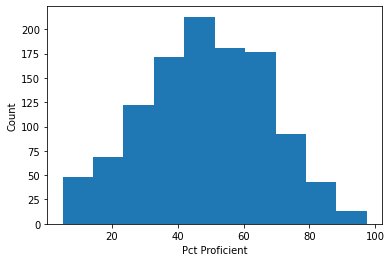

In [27]:
PctProficient = SBSA_ela['PctProficient']
_ = plt.hist(PctProficient)
_ = plt.xlabel('Pct Proficient')
_ = plt.ylabel('Count')
plt.show()

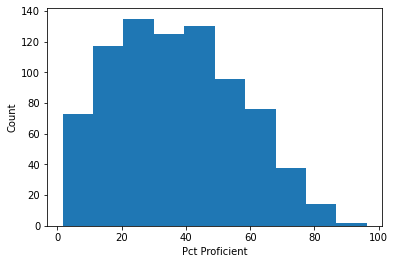

In [28]:
PctProficient = SBSA_math['PctProficient']
_ = plt.hist(PctProficient)
_ = plt.xlabel('Pct Proficient')
_ = plt.ylabel('Count')
plt.show()

In [29]:
SBSA_ela = SBSA_ela.drop(columns=['School Year', 'School Code', 'Organization', 'Assessment Name', 'ContentArea', 'Grade', 'ScaleScoreAvg'])
SBSA_ela.head()

,PctProficient,FallEnrollment,"Students Per Teacher, Regular","Students Per Teacher, Special","Students Per Specialist, Instructional",Students Per Assistant Superintendent,Students Per Administrative Assistant,"Students Per Supervisor, Pupil Support",Students Per Crafts & Trades,Students Per Technical,...,Students Per Nurse,Students Per Social Worker,Students Per Principal,Students Per Guidance Counselor,Students Per Assistant Principal,Students Per Librarian,Students Per Service Aide,Students Per Bus Driver & Laborer,Students Per Other General Support,Students Per Psychometrist
0,69.06,699.0,19.971429,116.500000,699.0,NaN,NaN,NaN,NaN,NaN,...,699.0,NaN,699.0,699.0,NaN,NaN,NaN,NaN,NaN,NaN
2,80.84,436.0,16.769231,145.333333,436.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,436.0,436.0,436.0,436.0,NaN,NaN,NaN,NaN
4,63.08,442.0,17.680000,55.250000,NaN,NaN,NaN,NaN,NaN,NaN,...,442.0,NaN,442.0,442.0,442.0,442.0,NaN,NaN,NaN,NaN
6,75.00,495.0,19.800000,123.750000,495.0,NaN,NaN,NaN,NaN,NaN,...,495.0,NaN,495.0,495.0,495.0,495.0,495.0,NaN,NaN,NaN
8,73.04,542.0,19.357143,180.666667,NaN,NaN,NaN,NaN,NaN,NaN,...,542.0,NaN,542.0,542.0,NaN,542.0,NaN,NaN,NaN,NaN


In [30]:
SBSA_math = SBSA_math.drop(columns=['School Year', 'School Code', 'Organization', 'Assessment Name', 'ContentArea', 'Grade', 'ScaleScoreAvg'])
SBSA_math.head()

,PctProficient,FallEnrollment,"Students Per Teacher, Regular","Students Per Teacher, Special","Students Per Specialist, Instructional",Students Per Assistant Superintendent,Students Per Administrative Assistant,"Students Per Supervisor, Pupil Support",Students Per Crafts & Trades,Students Per Technical,...,Students Per Nurse,Students Per Social Worker,Students Per Principal,Students Per Guidance Counselor,Students Per Assistant Principal,Students Per Librarian,Students Per Service Aide,Students Per Bus Driver & Laborer,Students Per Other General Support,Students Per Psychometrist
1,59.75,699.0,19.971429,116.500000,699.0,NaN,NaN,NaN,NaN,NaN,...,699.0,NaN,699.0,699.0,NaN,NaN,NaN,NaN,NaN,NaN
3,65.12,436.0,16.769231,145.333333,436.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,436.0,436.0,436.0,436.0,NaN,NaN,NaN,NaN
5,57.60,442.0,17.680000,55.250000,NaN,NaN,NaN,NaN,NaN,NaN,...,442.0,NaN,442.0,442.0,442.0,442.0,NaN,NaN,NaN,NaN
7,68.15,495.0,19.800000,123.750000,495.0,NaN,NaN,NaN,NaN,NaN,...,495.0,NaN,495.0,495.0,495.0,495.0,495.0,NaN,NaN,NaN
9,56.66,542.0,19.357143,180.666667,NaN,NaN,NaN,NaN,NaN,NaN,...,542.0,NaN,542.0,542.0,NaN,542.0,NaN,NaN,NaN,NaN


<AxesSubplot:>

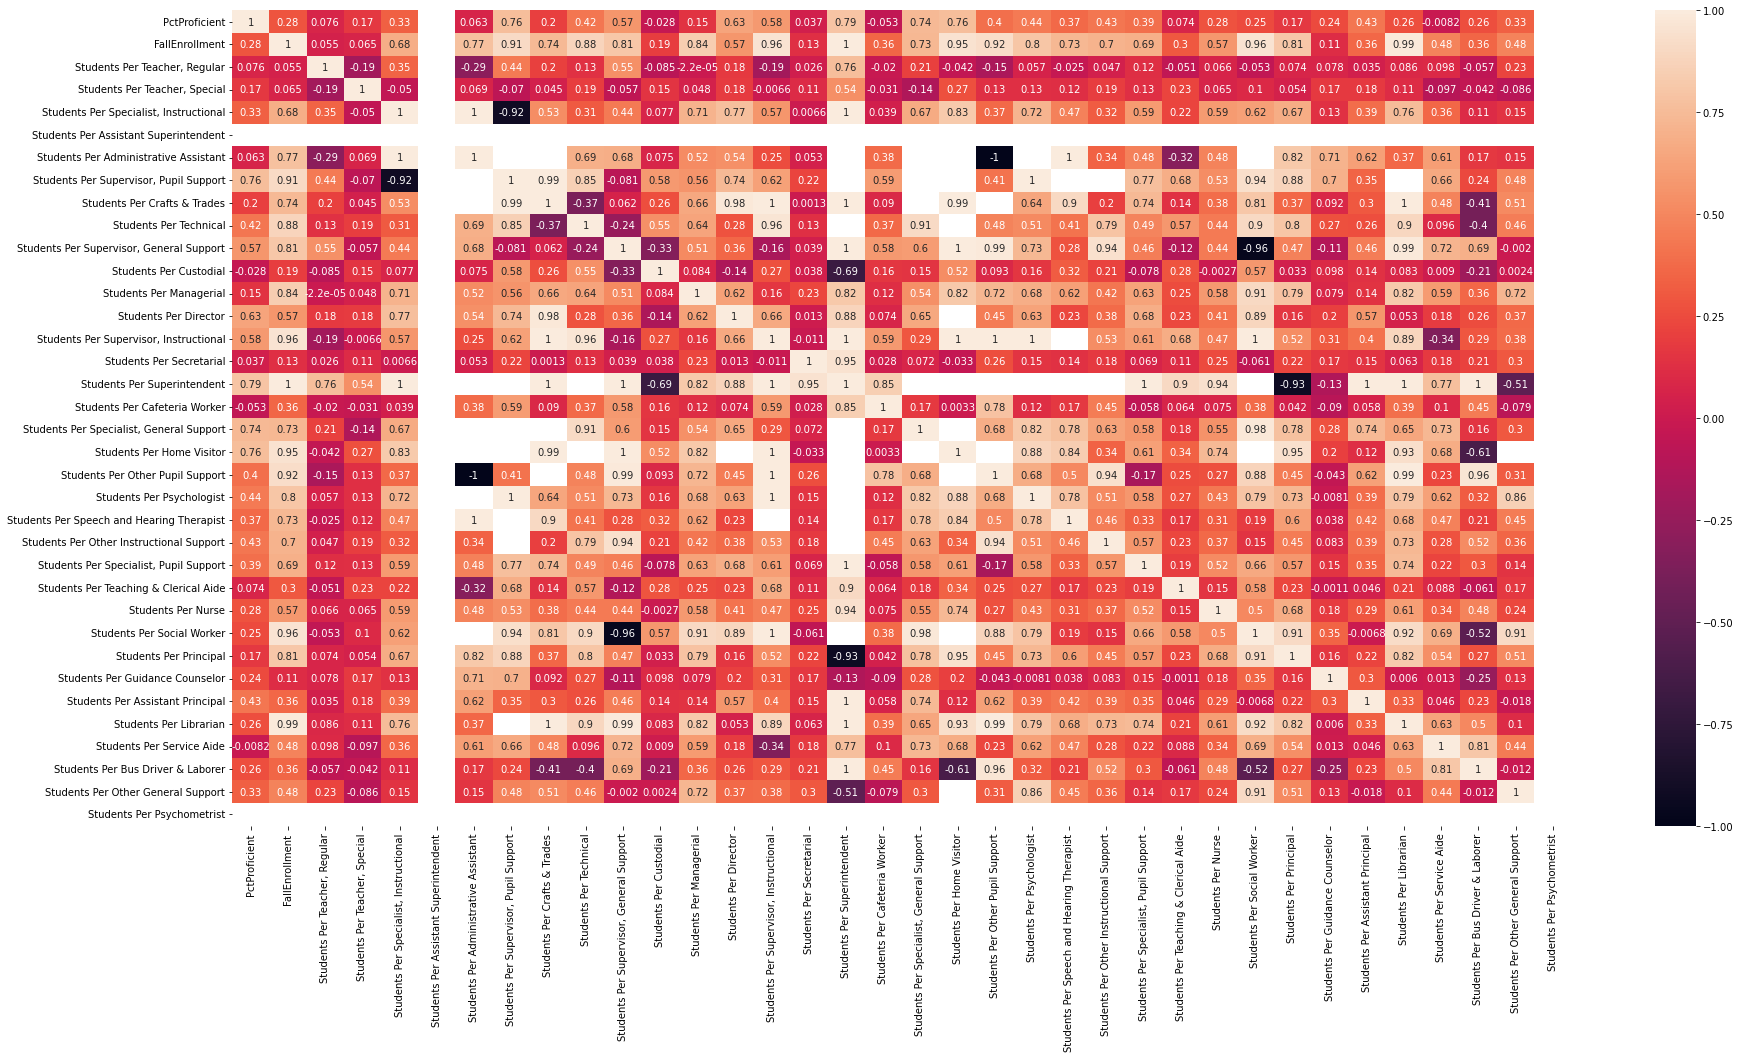

In [31]:
plt.figure(figsize=(30,15))
sns.heatmap(SBSA_ela.corr(), annot=True)

<AxesSubplot:>

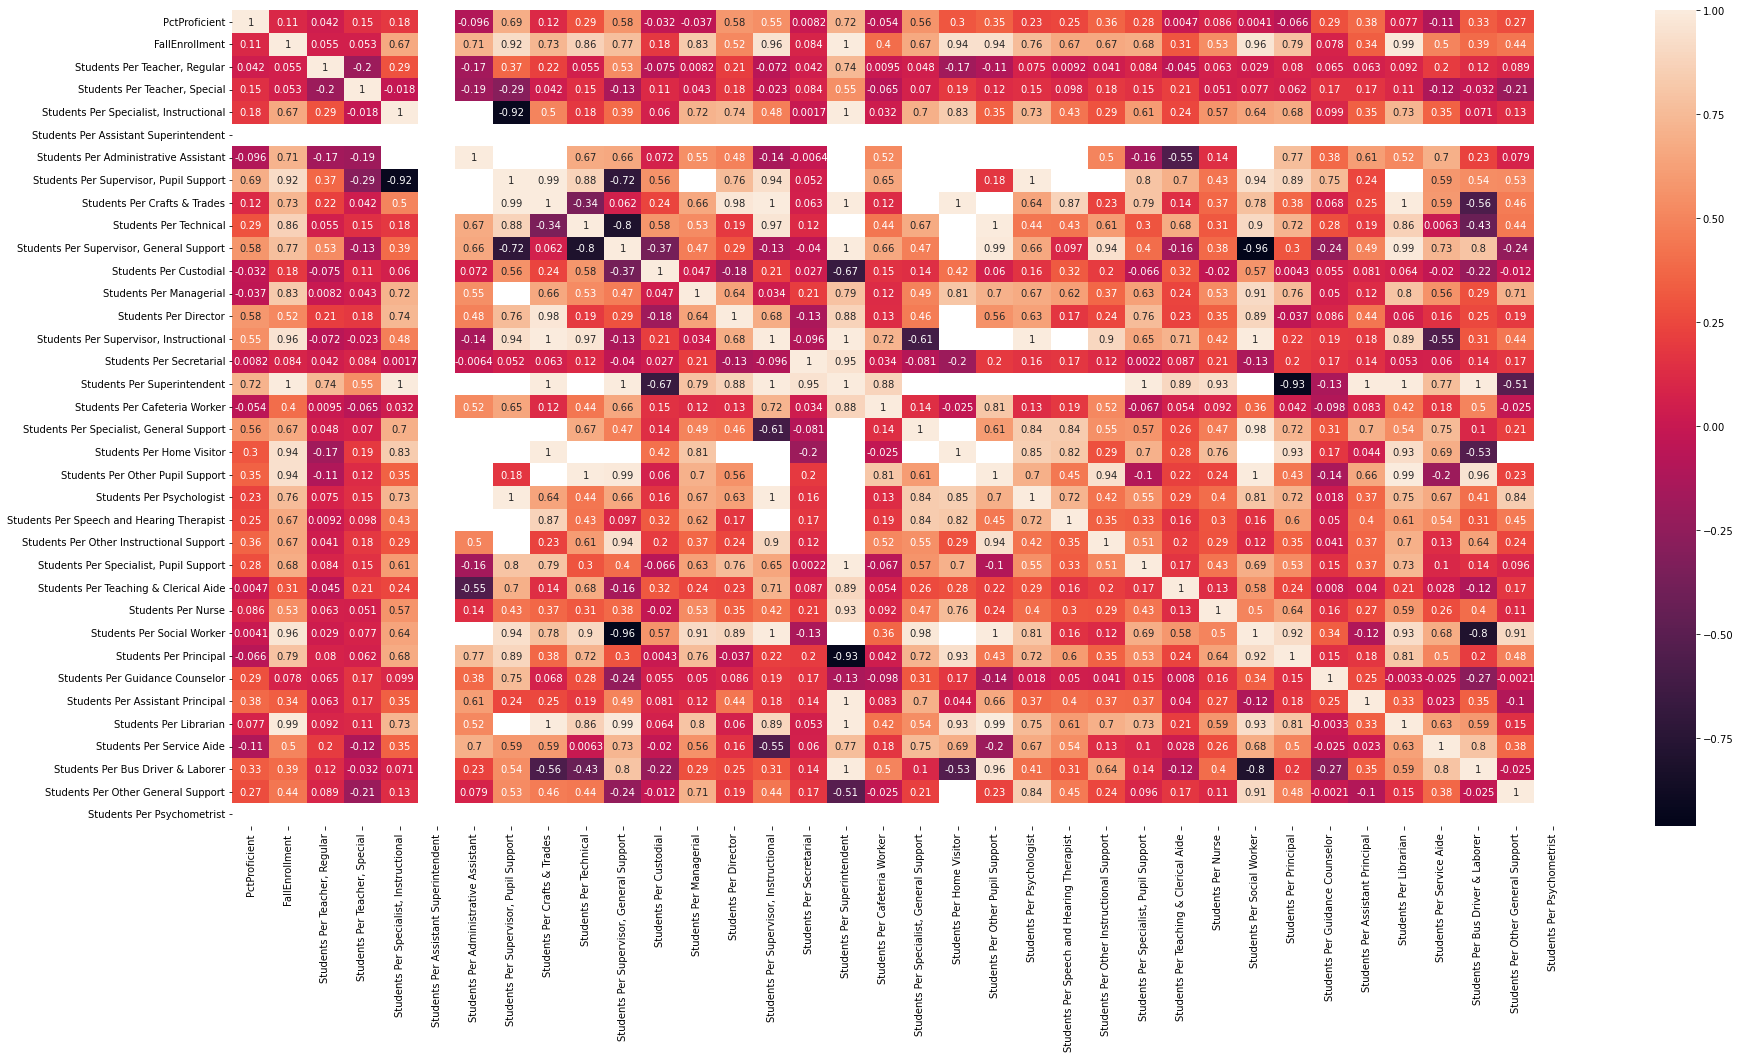

In [33]:
plt.figure(figsize=(30,15))
sns.heatmap(SBSA_math.corr(), annot=True)